# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Lecture 4 </span>

##  <span style="color:blue"> Exercise 4.1

Improvement of the MD code by enabling the possibility to (re)start reading not only an actual spatial configuration, but also an older one. Attached are some pictures which show that equilibration of all the thermodynamic phases has been reached.

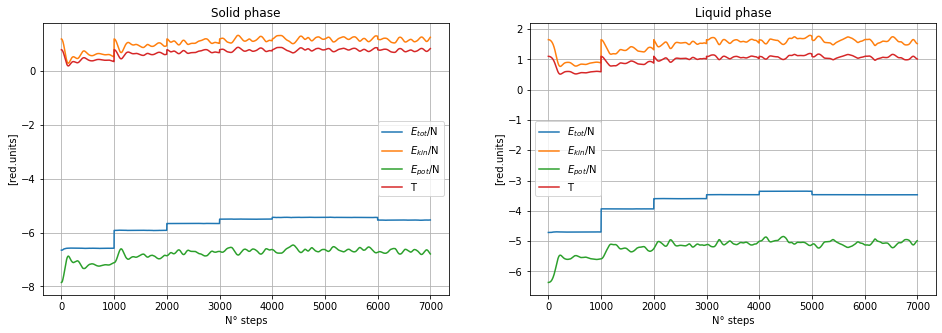

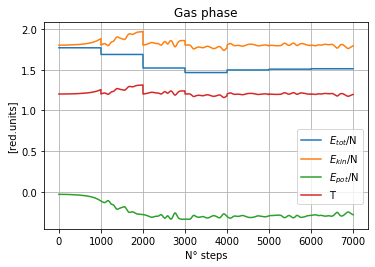

In [2]:
import numpy as np
import math
import matplotlib 
import matplotlib.pyplot as plt

N = 7000
Etot = np.zeros(N)
Epot = np.zeros(N)
Ekin = np.zeros(N)
T = np.zeros(N)
x = np.arange(N)

####SOLID

#Total Energy
file1 = open("./LSN4/solid_equilibration/output_etot.dat")
line1 = file1.readlines()
for i in range(N):
    a = line1[i].split(" ")
    Etot[i] = a[0]
file1.close()

#Kinetic Energy
file2=open("./LSN4/solid_equilibration/output_ekin.dat")
line2=file2.readlines()
for i in range(N):
    a=line2[i].split(" ")
    Ekin[i]=a[0]
file2.close()
    
#Potential Energy
file3=open("./LSN4/solid_equilibration/output_epot.dat")
line3=file3.readlines()
for i in range(N):
    a=line3[i].split(" ")
    Epot[i]=a[0]
file3.close()
    
#Temperature
file4=open("./LSN4/solid_equilibration/output_temp.dat")
line4=file4.readlines()
for i in range(N):
    a=line4[i].split(" ")
    T[i]=a[0]
file4.close()

    
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(x,Etot,label="$E_{tot}$/N")
plt.plot(x,Ekin,label="$E_{kin}$/N")
plt.plot(x,Epot,label="$E_{pot}$/N")
plt.plot(x,T,label="T")
plt.xlabel("N° steps")
plt.ylabel("[red.units]")
plt.grid(True)
plt.legend()
plt.title("Solid phase")

####LIQUID

#Total Energy
file1 = open("./LSN4/liquid_equilibration/output_etot.dat")
line1 = file1.readlines()
for i in range(N):
    a = line1[i].split(" ")
    Etot[i] = a[0]
file1.close()

#Kinetic Energy
file2=open("./LSN4/liquid_equilibration/output_ekin.dat")
line2=file2.readlines()
for i in range(N):
    a=line2[i].split(" ")
    Ekin[i]=a[0]
file2.close()
    
#Potential Energy
file3=open("./LSN4/liquid_equilibration/output_epot.dat")
line3=file3.readlines()
for i in range(N):
    a=line3[i].split(" ")
    Epot[i]=a[0]
file3.close()
    
#Temperature
file4=open("./LSN4/liquid_equilibration/output_temp.dat")
line4=file4.readlines()
for i in range(N):
    a=line4[i].split(" ")
    T[i]=a[0]
file4.close()

plt.subplot(1, 2, 2)
plt.plot(x,Etot,label="$E_{tot}$/N")
plt.plot(x,Ekin,label="$E_{kin}$/N")
plt.plot(x,Epot,label="$E_{pot}$/N")
plt.plot(x,T,label="T")
plt.xlabel("N° steps")
plt.ylabel("[red.units]")
plt.grid(True)
plt.legend()
plt.title("Liquid phase")

####GAS

#Total Energy
file1 = open("./LSN4/gas_equilibration/output_etot.dat")
line1 = file1.readlines()
for i in range(N):
    a = line1[i].split(" ")
    Etot[i] = a[0]
file1.close()

#Kinetic Energy
file2=open("./LSN4/gas_equilibration/output_ekin.dat")
line2=file2.readlines()
for i in range(N):
    a=line2[i].split(" ")
    Ekin[i]=a[0]
file2.close()
    
#Potential Energy
file3=open("./LSN4/gas_equilibration/output_epot.dat")
line3=file3.readlines()
for i in range(N):
    a=line3[i].split(" ")
    Epot[i]=a[0]
file3.close()
    
#Temperature
file4=open("./LSN4/gas_equilibration/output_temp.dat")
line4=file4.readlines()
for i in range(N):
    a=line4[i].split(" ")
    T[i]=a[0]
file4.close()

plt.figure(figsize=(5.8, 3.8))
plt.plot(x,Etot,label="$E_{tot}$/N")
plt.plot(x,Ekin,label="$E_{kin}$/N")
plt.plot(x,Epot,label="$E_{pot}$/N")
plt.plot(x,T,label="T")
plt.xlabel("N° steps")
plt.ylabel("[red.units]")
plt.grid(True)
plt.legend(loc='center right', bbox_to_anchor=(1.0, 0.3))
plt.title("Gas phase")

plt.subplots_adjust(wspace=0.15)
plt.show()



###  Comments
* For all phases, 7 runs were performed, each with 1000 Verlet steps. The first run starts from a user-given configuration (which is always the FCC ordered one), the other ones read the last two configurations from the previous run 
* Densities, cutoff radii and (starting) temperatures are the same as in the exercise below
* All phases require some time (3-5 runs) before all the observables are stabilized
* Kinetic and potential energy (and necessarily temperature) fluctuate on a way larger scale than total energy, which is expected to be conserved by Verlet algorithm
* Total energy is indeed well conserved within each run, but turns out to be only piecewise constant when all runs are considered. This is likely due to both positions and velocities (thus both kinetic and potential energy) being manipulated when restarting from a previous run, as of the request
* Total energy is negative in the S and L phase, positive in the G, which would thus not be bound (yet this could in principle be compensated including tail corrections)

##  <span style="color:blue"> Exercise 4.2 

Equilibration and MD simulation via a Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

Energies are reported in meV/particle, which is the right energy scale for particles interacting via V$_{LJ}$

Blocking parameters: 50000 time steps, sorted into 500 blocks.

### Solid

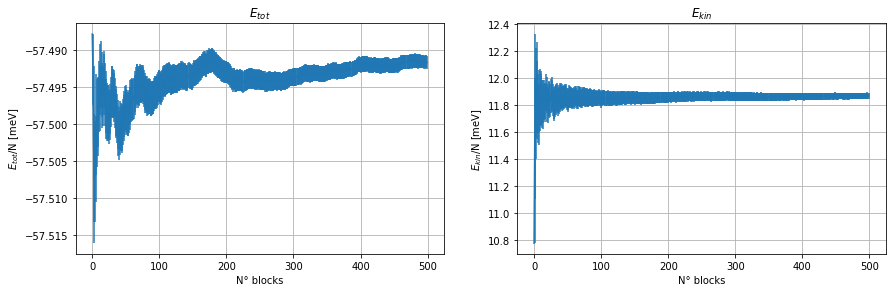

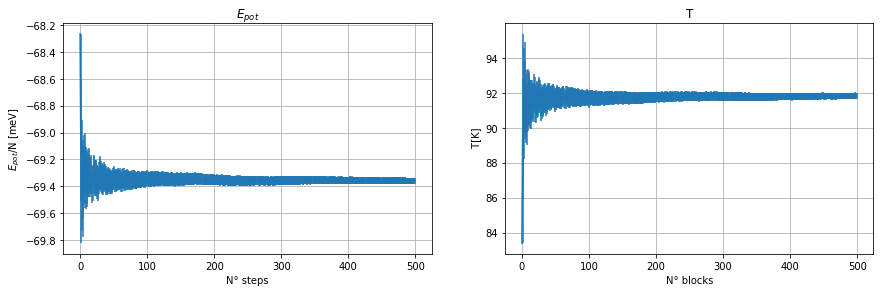

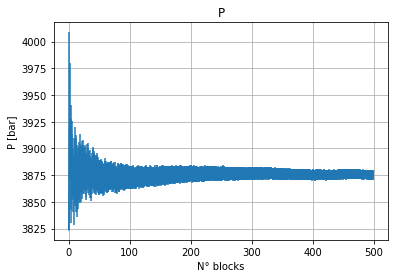

Total energy = -57.4917 ± 0.0009 meV/particle
Kinetic energy = 11.8698 ± 0.0237 meV/particle
Potential energy = -69.3614 ± 0.024 meV/particle
Temperature = 91.8318 ± 0.1831 K
Pressure = 3875.306 ± 4.4442 bar


In [3]:
N = 500
sum_prog = np.zeros(N)
err_prog = np.zeros(N)
sum_prog2 = np.zeros(N)
err_prog2 = np.zeros(N)
sum_prog3 = np.zeros(N)
err_prog3 = np.zeros(N)
sum_prog4 = np.zeros(N)
err_prog4 = np.zeros(N)
sum_prog5 = np.zeros(N)
err_prog5 = np.zeros(N)
x = np.arange(N)

#LJ parameters for Ar
sigma = 0.34*10**(-9)
eps_K = 120
mass = 39.948*1.66054*10**(-27)
K = 1.3806*10**(-23)
eps = eps_K*K
J_to_meV = 6.2415093433*10**(21)

file1=open("./LSN4/solid_measure/ave_etot.dat")
file2=open("./LSN4/solid_measure/ave_ekin.dat")
file3=open("./LSN4/solid_measure/ave_epot.dat")
file4=open("./LSN4/solid_measure/ave_temp.dat") 
file5=open("./LSN4/solid_measure/ave_pres.dat") 
 
#Total Energy 
line1=file1.readlines()
for i in range(N):
    a=line1[i].split(" ")
    sum_prog[i]=a[1]
    err_prog[i]=a[2]
file1.close()
    
#Kinetic Energy
line2=file2.readlines()
for i in range(N):
    b=line2[i].split(" ")
    sum_prog2[i]=b[1]
    err_prog2[i]=b[2]
file2.close()
    
plt.figure()

plt.subplot(121)
plt.errorbar(x, sum_prog*eps*J_to_meV, yerr=err_prog*eps*J_to_meV)
plt.xlabel("N° blocks")
plt.ylabel("$E_{tot}$/N [meV]")
plt.grid(True)
plt.title("$E_{tot}$")
    
plt.subplot(122)
plt.errorbar(x, sum_prog2*eps*J_to_meV, yerr=err_prog2*eps*J_to_meV)
plt.xlabel("N° blocks")
plt.ylabel("$E_{kin}$/N [meV]")
plt.grid(True)
plt.title("$E_{kin}$")
    
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
plt.show()

#Potential Energy   
line3=file3.readlines()
for i in range(N):
    a=line3[i].split(" ")
    sum_prog3[i]=a[1]
    err_prog3[i]=a[2]
file3.close()

#Temperature
line4=file4.readlines()
for i in range(N):
    b=line4[i].split(" ")
    sum_prog4[i]=b[1]
    err_prog4[i]=b[2]
file4.close()

plt.figure()

plt.subplot(121)
plt.errorbar(x, sum_prog3*eps*J_to_meV, yerr=err_prog3*eps*J_to_meV)
plt.xlabel("N° steps")
plt.ylabel("$E_{pot}$/N [meV]")
plt.grid(True)
plt.title("$E_{pot}$")
    
plt.subplot(122)
plt.errorbar(x,sum_prog4*eps_K,yerr=err_prog4*eps_K)
plt.xlabel("N° blocks")
plt.ylabel(" T[K]")
plt.grid(True)
plt.title("T")
    
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
plt.show()

#Pressure
line5=file5.readlines()
for i in range(N):
    b=line5[i].split(" ")
    sum_prog5[i]=b[1]
    err_prog5[i]=b[2]
file4.close()

plt.figure()
plt.errorbar(x, sum_prog5*eps*(1./(sigma**3))*(10**(-5)), yerr=err_prog5*eps*(1./(sigma**3))*(10**(-5)))
plt.xlabel("N° blocks")
plt.ylabel("P [bar]")
plt.grid(True)
plt.title("P")
plt.show()

print("Total energy =", round(sum_prog[499]*eps*J_to_meV,4), u"\u00b1",  round(err_prog[499]*eps*J_to_meV,4), "meV/particle")
print("Kinetic energy =", round(sum_prog2[499]*eps*J_to_meV,4), u"\u00b1",  round(err_prog2[499]*eps*J_to_meV,4), "meV/particle")
print("Potential energy =", round(sum_prog3[499]*eps*J_to_meV,4), u"\u00b1",  round(err_prog3[499]*eps*J_to_meV,4), "meV/particle")
print("Temperature =", round(sum_prog4[499]*eps_K,4), u"\u00b1",  round(err_prog4[499]*eps_K,4), "K")
print("Pressure =", round(sum_prog5[499]*eps*(1./(sigma**3))*(10**(-5)),4), u"\u00b1",  round(err_prog5[499]*eps*(1./(sigma**3))*(10**(-5)),4), "bar")

### Liquid

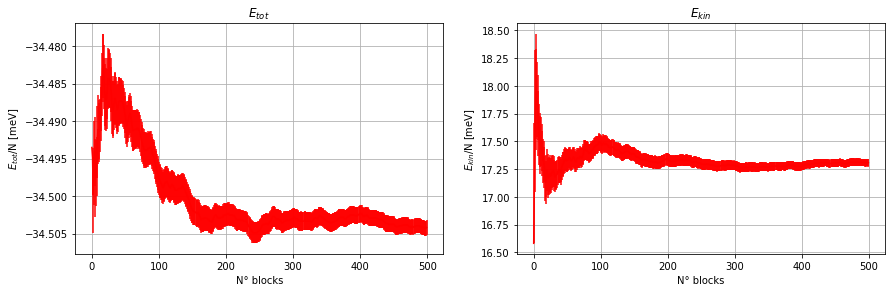

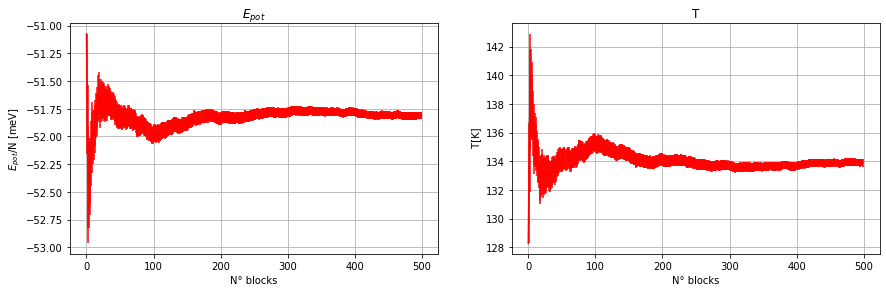

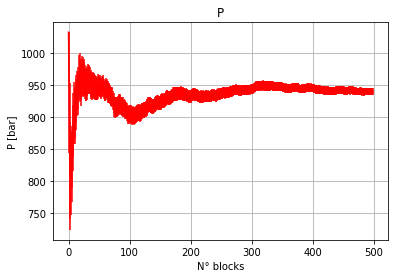

Total energy = -34.5042 ± 0.001 meV/particle
Kinetic energy = 17.307 ± 0.0338 meV/particle
Potential energy = -51.8112 ± 0.0339 meV/particle
Temperature = 133.8972 ± 0.2614 K
Pressure = 939.8463 ± 5.8629 bar


In [4]:
file1=open("./LSN4/liquid_measure/ave_etot.dat")
file2=open("./LSN4/liquid_measure/ave_ekin.dat")
file3=open("./LSN4/liquid_measure/ave_epot.dat")
file4=open("./LSN4/liquid_measure/ave_temp.dat")
file5=open("./LSN4/liquid_measure/ave_pres.dat")

#Total Energy 
line1=file1.readlines()
for i in range(N):
    a=line1[i].split(" ")
    sum_prog[i]=a[1]
    err_prog[i]=a[2]
file1.close()
    
#Kinetic Energy
line2=file2.readlines()
for i in range(N):
    b=line2[i].split(" ")
    sum_prog2[i]=b[1]
    err_prog2[i]=b[2]
file2.close()
    
plt.figure()

plt.subplot(121)
plt.errorbar(x, sum_prog*eps*J_to_meV, yerr=err_prog*eps*J_to_meV, color='r')
plt.xlabel("N° blocks")
plt.ylabel("$E_{tot}$/N [meV]")
plt.grid(True)
plt.title("$E_{tot}$")
    
plt.subplot(122)
plt.errorbar(x, sum_prog2*eps*J_to_meV, yerr=err_prog2*eps*J_to_meV, color='r')
plt.xlabel("N° blocks")
plt.ylabel("$E_{kin}$/N [meV]")
plt.grid(True)
plt.title("$E_{kin}$")
    
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
plt.show()

#Potential Energy   
line3=file3.readlines()
for i in range(N):
    a=line3[i].split(" ")
    sum_prog3[i]=a[1]
    err_prog3[i]=a[2]
file3.close()

#Temperature
line4=file4.readlines()
for i in range(N):
    b=line4[i].split(" ")
    sum_prog4[i]=b[1]
    err_prog4[i]=b[2]
file4.close()

plt.figure()

plt.subplot(121)
plt.errorbar(x, sum_prog3*eps*J_to_meV, yerr=err_prog3*eps*J_to_meV, color='r')
plt.xlabel("N° blocks")
plt.ylabel("$E_{pot}$/N [meV]")
plt.grid(True)
plt.title("$E_{pot}$")
    
plt.subplot(122)
plt.errorbar(x,sum_prog4*eps_K,yerr=err_prog4*eps_K, color='r')
plt.xlabel("N° blocks")
plt.ylabel(" T[K]")
plt.grid(True)
plt.title("T")
    
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
plt.show()

#Pressure
line5=file5.readlines()
for i in range(N):
    b=line5[i].split(" ")
    sum_prog5[i]=b[1]
    err_prog5[i]=b[2]
file4.close()

plt.figure()
plt.errorbar(x, sum_prog5*eps*(1./(sigma**3))*(10**(-5)), yerr=err_prog5*eps*(1./(sigma**3))*(10**(-5)), color='r')
plt.xlabel("N° blocks")
plt.ylabel("P [bar]")
plt.grid(True)
plt.title("P")
plt.show()

print("Total energy =", round(sum_prog[499]*eps*J_to_meV,4), u"\u00b1",  round(err_prog[499]*eps*J_to_meV,4), "meV/particle")
print("Kinetic energy =", round(sum_prog2[499]*eps*J_to_meV,4), u"\u00b1",  round(err_prog2[499]*eps*J_to_meV,4), "meV/particle")
print("Potential energy =", round(sum_prog3[499]*eps*J_to_meV,4), u"\u00b1",  round(err_prog3[499]*eps*J_to_meV,4), "meV/particle")
print("Temperature =", round(sum_prog4[499]*eps_K,4), u"\u00b1",  round(err_prog4[499]*eps_K,4), "K")
print("Pressure =", round(sum_prog5[499]*eps*(1./(sigma**3))*(10**(-5)),4), u"\u00b1",  round(err_prog5[499]*eps*(1./(sigma**3))*(10**(-5)),4), "bar")

### Gas

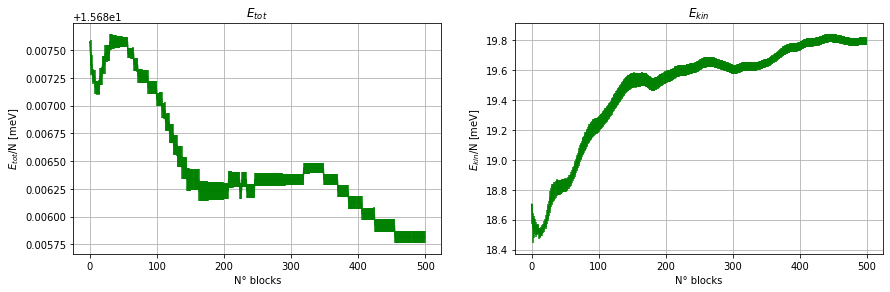

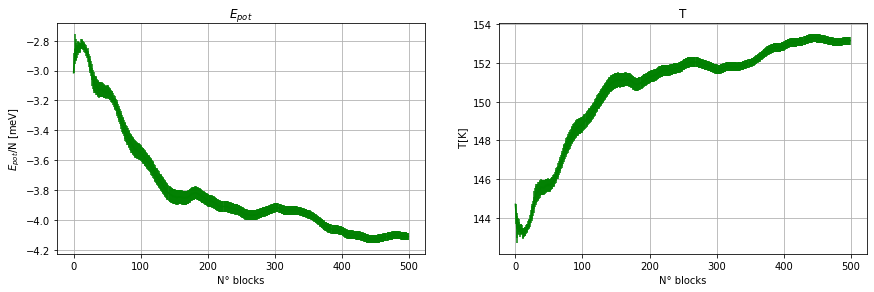

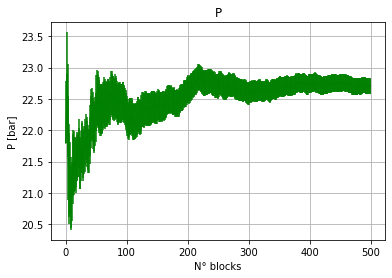

Total energy = 15.6858 ± 0.0001 meV/particle
Kinetic energy = 19.7967 ± 0.0259 meV/particle
Potential energy = -4.1108 ± 0.0259 meV/particle
Temperature = 153.1596 ± 0.2001 K
Pressure = 22.7091 ± 0.1295 bar


In [5]:
file1=open("./LSN4/gas_measure/ave_etot.dat")
file2=open("./LSN4/gas_measure/ave_ekin.dat")
file3=open("./LSN4/gas_measure/ave_epot.dat")
file4=open("./LSN4/gas_measure/ave_temp.dat")
file5=open("./LSN4/gas_measure/ave_pres.dat")

#Total Energy 
line1=file1.readlines()
for i in range(N):
    a=line1[i].split(" ")
    sum_prog[i]=a[1]
    err_prog[i]=a[2]
file1.close()
  
#Kinetic Energy
line2=file2.readlines()
for i in range(N):
    b=line2[i].split(" ")
    sum_prog2[i]=b[1]
    err_prog2[i]=b[2]
file2.close()
    
plt.figure()

plt.subplot(121)
plt.errorbar(x, sum_prog*eps*J_to_meV, yerr=err_prog*eps*J_to_meV, color='g')
plt.xlabel("N° blocks")
plt.ylabel("$E_{tot}$/N [meV]")
#plt.ylim(15.68,15.69)            #forces the scale to O(15 meV)
plt.grid(True)
plt.title("$E_{tot}$")
    
plt.subplot(122)
plt.errorbar(x, sum_prog2*eps*J_to_meV, yerr=err_prog2*eps*J_to_meV, color='g')
plt.xlabel("N° blocks")
plt.ylabel("$E_{kin}$/N [meV]")
plt.grid(True)
plt.title("$E_{kin}$")
    
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
plt.show()

#Potential Energy   
line3=file3.readlines()
for i in range(N):
    a=line3[i].split(" ")
    sum_prog3[i]=a[1]
    err_prog3[i]=a[2]
file3.close()

#Temperature
line4=file4.readlines()
for i in range(N):
    b=line4[i].split(" ")
    sum_prog4[i]=b[1]
    err_prog4[i]=b[2]
file4.close()

plt.figure()

plt.subplot(121)
plt.errorbar(x, sum_prog3*eps*J_to_meV, yerr=err_prog3*eps*J_to_meV, color='g')
plt.xlabel("N° blocks")
plt.ylabel("$E_{pot}$/N [meV]")
plt.grid(True)
plt.title("$E_{pot}$")
    
plt.subplot(122)
plt.errorbar(x,sum_prog4*eps_K,yerr=err_prog4*eps_K, color='g')
plt.xlabel("N° blocks")
plt.ylabel(" T[K]")
plt.grid(True)
plt.title("T")
    
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
plt.show()

#Pressure
line5=file5.readlines()
for i in range(N):
    b=line5[i].split(" ")
    sum_prog5[i]=b[1]
    err_prog5[i]=b[2]
file4.close()

plt.figure()
plt.errorbar(x, sum_prog5*eps*(1./(sigma**3))*(10**(-5)), yerr=err_prog5*eps*(1./(sigma**3))*(10**(-5)), color='g')
plt.xlabel("N° blocks")
plt.ylabel("P [bar]")
plt.grid(True)
plt.title("P")
plt.show()

print("Total energy =", round(sum_prog[499]*eps*J_to_meV,4), u"\u00b1",  round(err_prog[499]*eps*J_to_meV,4), "meV/particle")
print("Kinetic energy =", round(sum_prog2[499]*eps*J_to_meV,4), u"\u00b1",  round(err_prog2[499]*eps*J_to_meV,4), "meV/particle")
print("Potential energy =", round(sum_prog3[499]*eps*J_to_meV,4), u"\u00b1",  round(err_prog3[499]*eps*J_to_meV,4), "meV/particle")
print("Temperature =", round(sum_prog4[499]*eps_K,4), u"\u00b1",  round(err_prog4[499]*eps_K,4), "K")
print("Pressure =", round(sum_prog5[499]*eps*(1./(sigma**3))*(10**(-5)),4), u"\u00b1",  round(err_prog5[499]*eps*(1./(sigma**3))*(10**(-5)),4), "bar")

<div>
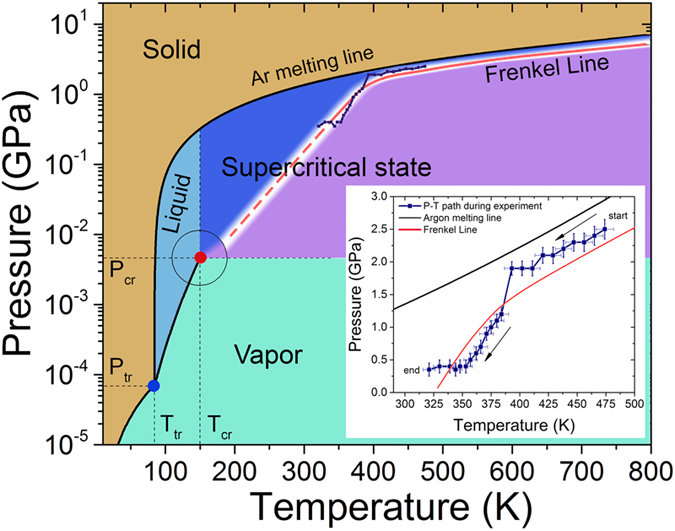
</div>

By comparing with the above Ar phase diagram, all results appear reasonable.